<a href="https://colab.research.google.com/github/Harsha194/Elevate_Labs_Tasks/blob/main/Task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

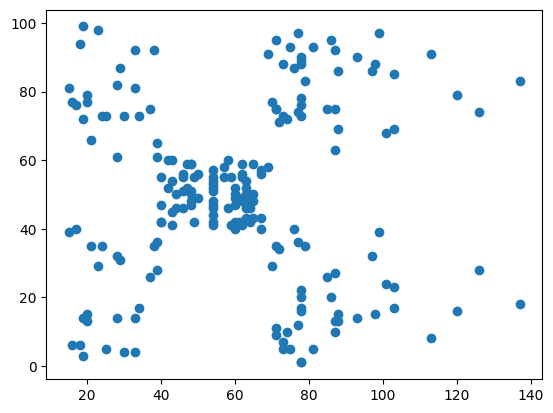

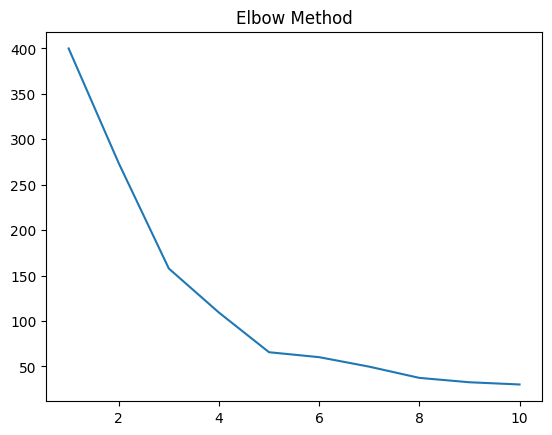

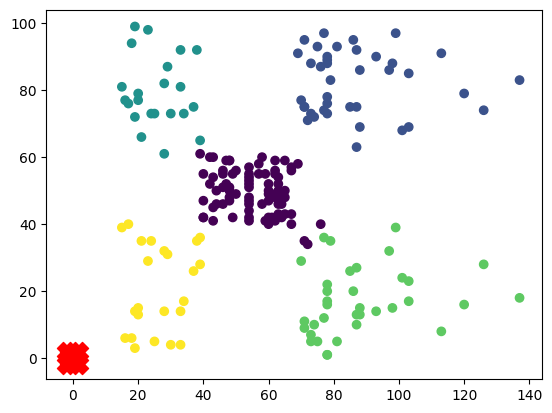

Silhouette Score: 0.55


In [2]:
# 1. Load and visualize data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Mall_Customers.csv')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Visualize raw data
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.show()

# 2. Preprocess data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Find optimal K (Elbow Method)
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.show()

# 4. Fit K-Means with optimal K
optimal_k = 5  # Choose based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 5. Visualize clusters
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c='red', marker='X')
plt.show()

# 6. Evaluate (Silhouette Score)
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score:.2f}")